<a href="https://colab.research.google.com/github/salmanromeo/MAE_5020_Data_Driven_Aerospace_Engineering/blob/main/DMD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

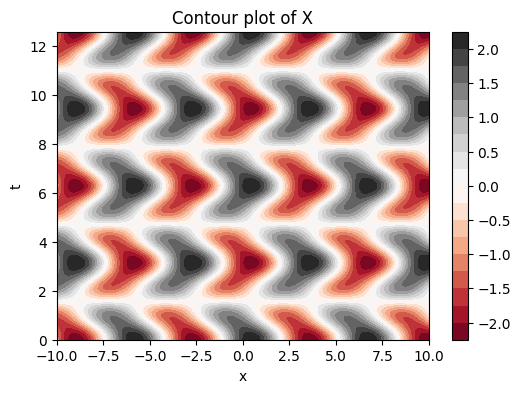

(201, 201) (201,) (201, 399)


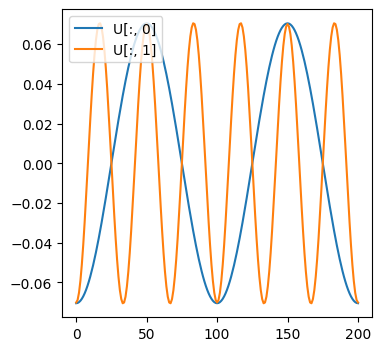

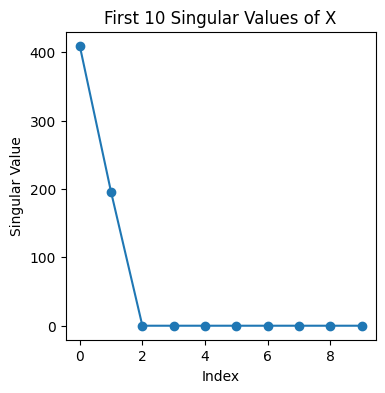

[4.09527433e+02 1.95626310e+02 1.77499679e-13 1.09547707e-13]


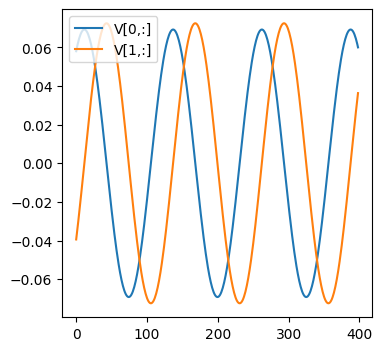

(201, 2) (2, 2) (2, 399)
(201, 399)
[[-0.0705383 -7.80625564e-18j -0.07018075+3.46944695e-17j]
 [-0.07039905-4.42960501e-03j -0.06893208-1.31947518e-02j]]
(2, 399)


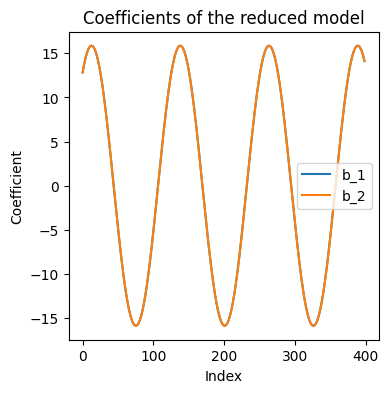

[ 1.62732573e-15-0.79776914j -9.86965311e-17+0.79776914j]


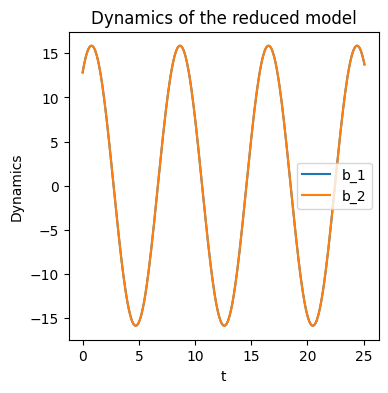

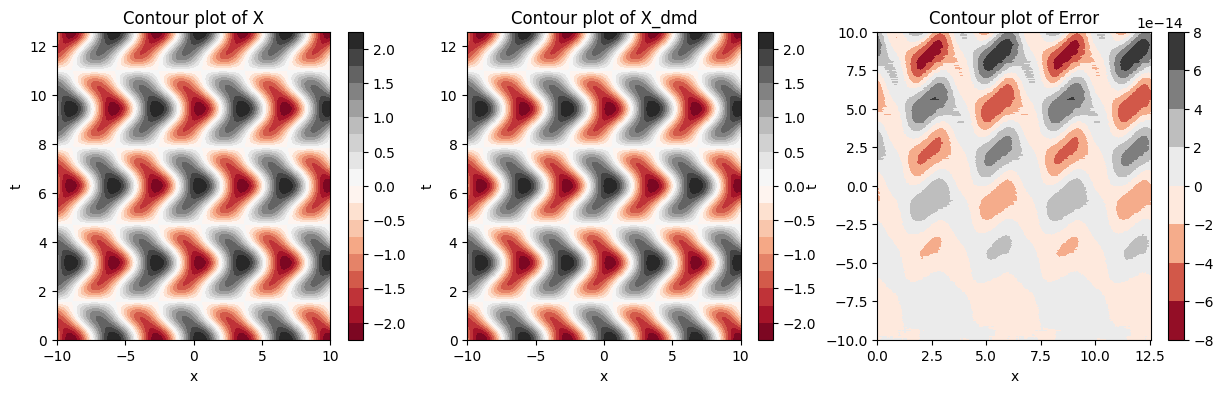

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define the functions
def f1(xx, tt):
    y_1 = 2 * np.cos(xx) * np.exp(1j * tt)
    return y_1

def f2(xx, tt):
    y_2 = np.sin(xx) * np.exp(3j * tt)
    return y_2

# Define time and space discretizations
xi = np.linspace(-10, 10, 400)
t = np.linspace(0, 4*np.pi, 201)
dt = t[1] - t[0]
xx, tt = np.meshgrid(xi, t)
X = f1(xx, tt) + f2(xx, tt)

plt.figure(figsize=(6, 4))
plt.contourf(xx, tt, np.real(X), 20, cmap='RdGy')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.title('Contour plot of X')
plt.show()

# Step 1 - SVD
X_1 = X[:, :-1]
X_2 = X[:, 1:]

U, Sigma, V = np.linalg.svd(X_1, full_matrices=False)
print(U.shape, Sigma.shape, V.shape)

plt.figure(figsize=(4, 4))
plt.plot(U[:, 0], label='U[:, 0]')
plt.plot(U[:, 1], label='U[:, 1]')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(4, 4))
plt.plot(Sigma[:10], 'o-')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.title('First 10 Singular Values of X')
plt.show()

print(Sigma[:4])

plt.figure(figsize=(4, 4))
plt.plot(V[0, :], label='V[0,:]')
plt.plot(V[1, :], label='V[1,:]')
plt.legend(loc='upper left')
plt.show()

U, Sigma, V = U[:, :2], Sigma[:2], V[:2, :]
print(U.shape, np.diag(Sigma).shape, V.shape)

print(X_2.shape)

print(U[:2, :2])

A_tilde = np.linalg.multi_dot([U.conj().T, X_2, V.conj().T, np.linalg.inv(np.diag(Sigma))])
Lambda, W = np.linalg.eig(A_tilde)

Phi = np.linalg.multi_dot([X_2, V.conj().T, np.linalg.inv(np.diag(Sigma)), W])

b, residuals, rank, sigma = np.linalg.lstsq(Phi, X_1, rcond=None)

print(b.shape)

plt.figure(figsize=(4, 4))
plt.plot(b[0], '-', label='b_1')
plt.plot(b[1], '-', label='b_2')
plt.xlabel('Index')
plt.ylabel('Coefficient')
plt.legend()
plt.title('Coefficients of the reduced model')
plt.show()

Omega = np.log(Lambda) / dt

print(Omega)

b = np.linalg.lstsq(Phi,X_1[:,0],rcond=None)[0]

t_exp = np.arange(X.shape[1]) * dt
temp = np.repeat(Omega.reshape(-1, 1), t_exp.size, axis=1)
dynamics = np.exp(temp * t_exp) * b.reshape(b.shape[0], -1)

plt.figure(figsize=(4, 4))
plt.plot(t_exp, dynamics[0, :], '-', label='b_1')
plt.plot(t_exp, dynamics[1, :], '-', label='b_2')
plt.xlabel('t')
plt.ylabel('Dynamics')
plt.legend()
plt.title('Dynamics of the reduced model')
plt.show()

X_dmd = Phi @ dynamics

plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.contourf(xx, tt, np.real(X), 20, cmap='RdGy')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.title('Contour plot of X')

plt.subplot(1, 3, 2)
plt.contourf(xx, tt, np.real(X_dmd), 20, cmap='RdGy')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.title('Contour plot of X_dmd')

X_diff = np.real(X) - np.real(X_dmd)
plt.subplot(1, 3, 3)
plt.contourf(tt, xx, X_diff , cmap='RdGy')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.title('Contour plot of Error')


plt.show()